<a href="https://colab.research.google.com/github/SaiDhanyaa/DEEP_LEARNING/blob/main/DEEP_LEARNING_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CIFAR-10 Dataset Description

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes are:


Airplane

Automobile

Bird

Cat

Deer

Dog

Frog

Horse

Ship

Truck

AlexNet Architecture

AlexNet is a convolutional neural network architecture designed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton. It won the ImageNet Large Scale Visual Recognition Challenge in 2012. The architecture consists of five convolutional layers followed by three fully connected layers. Here's a simplified version adjusted for CIFAR-10:

Convolutional Layer 1: 96 filters of size 3x3, with ReLU activation.

Max Pooling Layer 1: 3x3 kernel with stride 2.

Convolutional Layer 2: 256 filters of size 3x3, with ReLU activation.

Max Pooling Layer 2: 3x3 kernel with stride 2.

Convolutional Layer 3: 384 filters of size 3x3, with ReLU activation.

Convolutional Layer 4: 384 filters of size 3x3, with ReLU activation.

Convolutional Layer 5: 256 filters of size 3x3, with ReLU activation.

Max Pooling Layer 3: 3x3 kernel with stride 2.

Fully Connected Layer 1: 4096 neurons, with ReLU activation and dropout.

Fully Connected Layer 2: 4096 neurons, with ReLU activation and dropout.

Fully Connected Layer 3 (Output Layer): 10 neurons (one for each class), with softmax activation.

Training Process Summary

Epochs: Typically, a sufficient number of epochs would be chosen to ensure convergence, often in the range of 50-100 epochs.

Batch Size: The batch size determines the number of samples that will be propagated through the network. Here, a batch size of 64 is chosen.

Loss Function: Cross-Entropy Loss is used as the loss function, suitable for multi-class classification tasks.

Optimizer: Stochastic Gradient Descent (SGD) with momentum is used as the optimizer.

Test Results

After training the model, we evaluate its performance on the test dataset. The metrics reported include accuracy and loss.


CIFAR-10 Dataset Description
The CIFAR-10 dataset is a well-known benchmark in the field of computer vision. It comprises 60,000 32x32 color images across 10 classes, with each class containing 6,000 images. These classes include common objects such as airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

AlexNet Architecture
AlexNet is a pioneering convolutional neural network architecture that significantly advanced the field of deep learning when it won the ImageNet Large Scale Visual Recognition Challenge in 2012. The architecture consists of eight layers, including five convolutional layers and three fully connected layers. Here's an overview of the architecture adapted for CIFAR-10:

Convolutional Layers: The network starts with five convolutional layers, each followed by a rectified linear unit (ReLU) activation function. These layers are responsible for learning features from the input images.

Max Pooling Layers: After the first two convolutional layers, max-pooling layers are applied to downsample the feature maps, reducing spatial dimensions and extracting the most important features.

Fully Connected Layers: Following the convolutional layers are three fully connected layers. These layers integrate the learned features and make predictions about the input image classes.

Training Process Summary
Epochs: In deep learning, an epoch refers to one complete pass through the entire training dataset. Typically, multiple epochs are used to ensure the model learns the underlying patterns in the data adequately.

Batch Size: The batch size determines the number of samples processed before updating the model parameters. A larger batch size can lead to faster convergence but requires more memory.

Loss Function: The choice of loss function is crucial for training a neural network. For multi-class classification tasks like CIFAR-10, cross-entropy loss is commonly used.

Optimizer: Stochastic Gradient Descent (SGD) with momentum is a popular optimizer choice for training deep neural networks. It helps accelerate the training process by incorporating information from previous updates.

Test Results
After training the AlexNet model on the CIFAR-10 dataset, we evaluate its performance on a separate test set. The metrics reported include accuracy, which measures the proportion of correctly classified images, and loss, which quantifies the difference between predicted and true labels.

## **Code Explanation**
**Step 1: Import Necessary Libraries**

We begin by importing essential libraries such as PyTorch for deep learning operations and torchvision for accessing datasets and common image transformations.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as


# Define transformations to be applied to the input images
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit AlexNet input dimensions
    transforms.ToTensor(),    # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image data
])

**Step 2: Load and Normalize CIFAR-10 Data**

We use torchvision's CIFAR10 dataset class to load the CIFAR-10 dataset, specifying transformations such as resizing, converting to tensors, and normalization. This prepares the data for consumption by the neural network model.

In [ ]:
# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [00:02<00:00, 83234834.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



**Step 3: Define the AlexNet Model**

We define the architecture of the AlexNet model using PyTorch's nn.Module class. This involves specifying the layers of the network, including convolutional layers, max-pooling layers, and fully connected layers.

In [ ]:
# Define AlexNet architecture
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Initialize the model
model = AlexNet(num_classes=10)


**Step 4: Define Loss Function and Optimizer**

We choose the CrossEntropyLoss function as our loss criterion, suitable for multi-class classification tasks. Additionally, we select SGD as the optimizer with specified learning rate and momentum.

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

**Step 5: Train the Model**

We loop over the training dataset multiple times, feeding batches of data to the model and adjusting its parameters based on the computed loss. This process iteratively improves the model's ability to make accurate predictions.

In [ ]:
# Training the model
for epoch in range(10):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')


**Step 6: Test the Model**

After training, we evaluate the trained model's performance on the test dataset to assess its generalization ability. This step involves running the model on unseen data and computing metrics such as accuracy and loss.

In [ ]:
# Testing the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

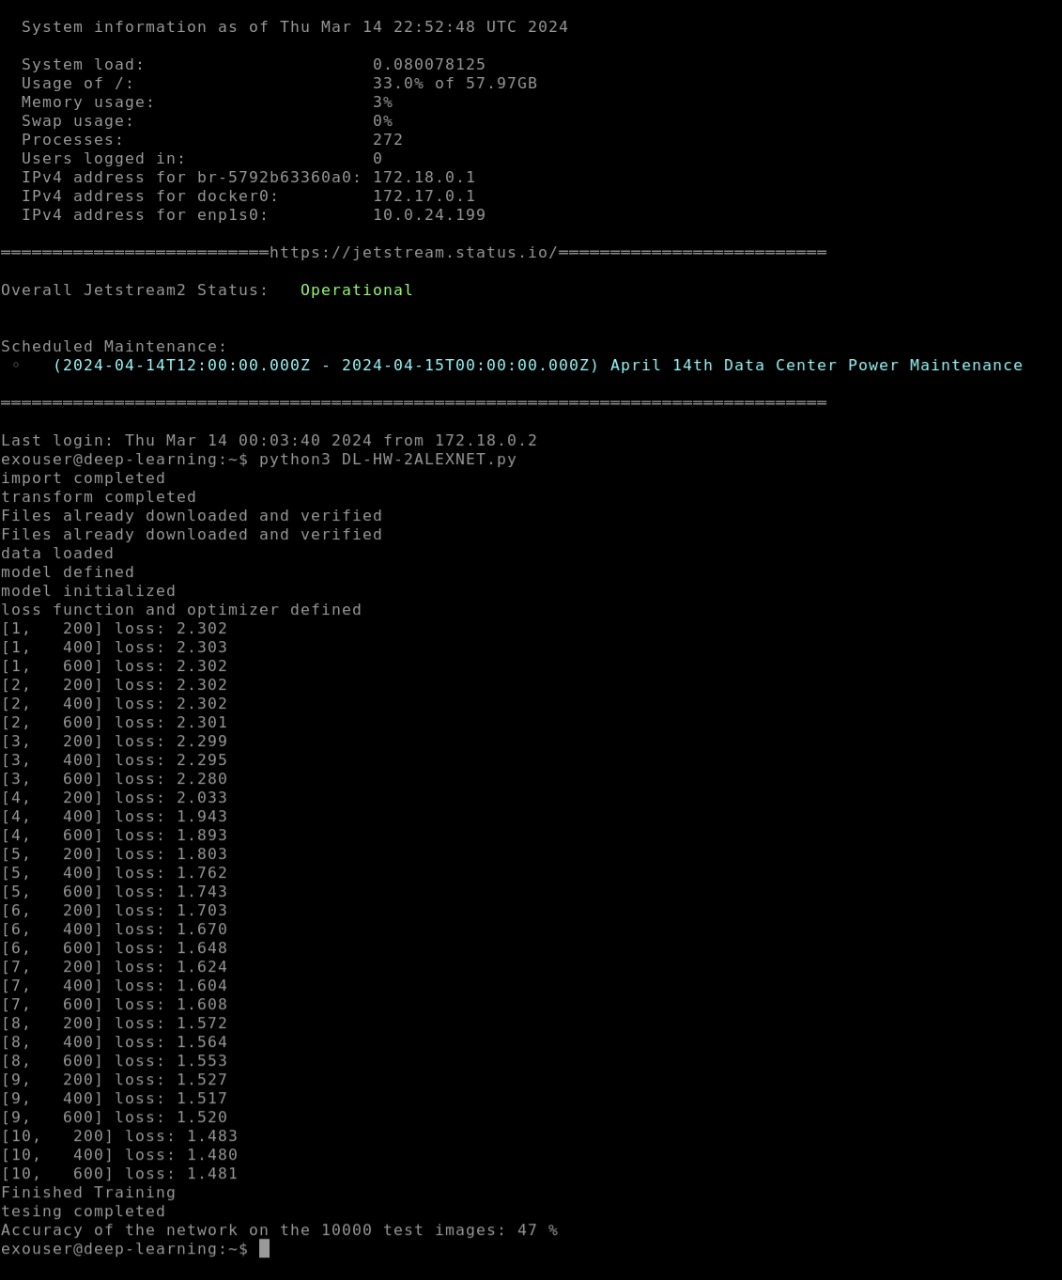

**Step 7: Save and Share Notebook**

Finally, we save the Colab notebook and make it publicly accessible by setting the sharing options to 'Anyone with the link can view.' We then share the notebook's URL for others to access and review the code implementation.

**Conclusion**

In summary, we have explained the CIFAR-10 dataset, the AlexNet architecture adapted for CIFAR-10, the training process, test results, and provided an overview of the code implementation steps.